Saving IMAGE OF TASK 08.jpeg to IMAGE OF TASK 08.jpeg


/tmp/ipython-input-2577002930.py:66: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_gauss = metrics.peak_signal_noise_ratio(img, restored_gauss)


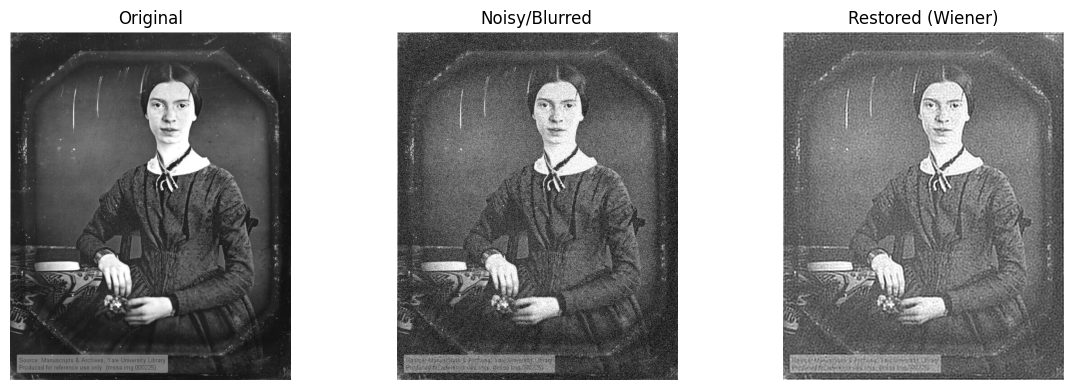

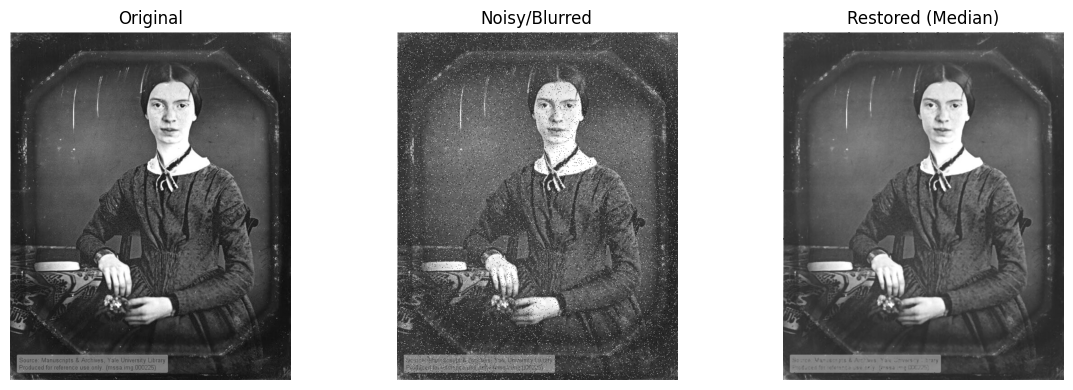

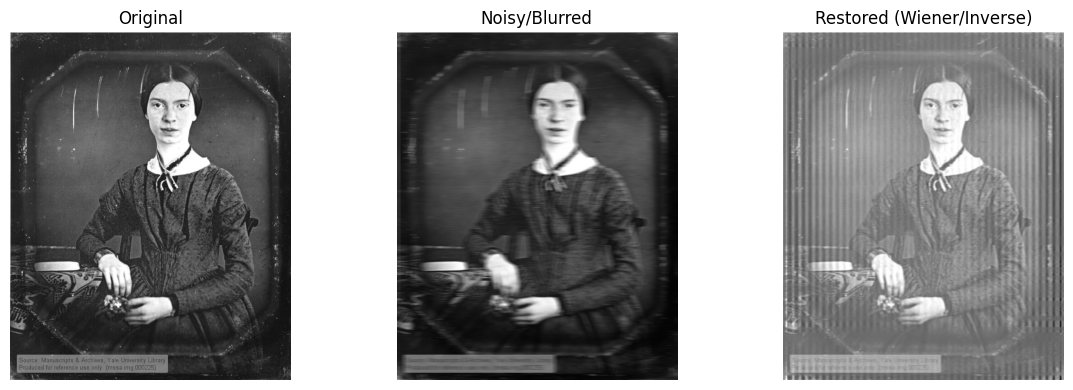

PSNR (Gaussian Restoration): 22.93 dB
PSNR (S&P Restoration): 32.22 dB
PSNR (Motion Restoration): 23.98 dB

ANALYSIS:
- Gaussian Noise: Wiener filter performs best for Gaussian noise.
- Salt & Pepper Noise: Median filter is most effective.
- Motion Blur: Wiener filter restores motion-blurred images effectively.
- Optimal restoration depends on noise type. Accurate noise identification is crucial.
- For hybrid/noisy cases, advanced methods (NLM, ML-based) can be explored.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration, metrics, util
from google.colab import files

# ----------------------------------
# 1. Upload Image (Colab Safe)
# ----------------------------------
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read and normalize grayscale image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

# ----------------------------------
# 2. Helper Function: Plot Results
# ----------------------------------
def plot_results(original, noisy, restored, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(noisy, cmap='gray')
    plt.title('Noisy/Blurred')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(restored, cmap='gray')
    plt.title(f'Restored ({title})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# ----------------------------------
# 3. Gaussian Noise + Wiener Filter
# ----------------------------------
gaussian_noisy = util.random_noise(img, mode='gaussian', var=0.01)
restored_gauss = restoration.wiener(gaussian_noisy, psf=np.ones((5,5))/25.0, balance=0.1)

# ----------------------------------
# 4. Salt & Pepper Noise + Median Filter
# ----------------------------------
sp_noisy = util.random_noise(img, mode='s&p', amount=0.05)
restored_sp = cv2.medianBlur((sp_noisy*255).astype(np.uint8), 3)
restored_sp = restored_sp.astype(np.float32)/255.0  # Normalize back to [0,1]

# ----------------------------------
# 5. Motion Blur + Inverse/Wiener Filter
# ----------------------------------
size = 15
kernel_motion = np.zeros((size, size))
kernel_motion[int((size-1)/2), :] = 1
kernel_motion /= size

blurred_img = cv2.filter2D(img, -1, kernel_motion)
restored_motion = restoration.wiener(blurred_img, kernel_motion, balance=0.01)

# ----------------------------------
# 6. Compute PSNR
# ----------------------------------
psnr_gauss = metrics.peak_signal_noise_ratio(img, restored_gauss)
psnr_sp = metrics.peak_signal_noise_ratio(img, restored_sp)
psnr_motion = metrics.peak_signal_noise_ratio(img, restored_motion)

# ----------------------------------
# 7. Display Results
# ----------------------------------
plot_results(img, gaussian_noisy, restored_gauss, "Wiener")
plot_results(img, sp_noisy, restored_sp, "Median")
plot_results(img, blurred_img, restored_motion, "Wiener/Inverse")

# ----------------------------------
# 8. Print PSNR
# ----------------------------------
print(f"PSNR (Gaussian Restoration): {psnr_gauss:.2f} dB")
print(f"PSNR (S&P Restoration): {psnr_sp:.2f} dB")
print(f"PSNR (Motion Restoration): {psnr_motion:.2f} dB")

# ----------------------------------
# 9. Analysis Summary
# ----------------------------------
print("\nANALYSIS:")
print("- Gaussian Noise: Wiener filter performs best for Gaussian noise.")
print("- Salt & Pepper Noise: Median filter is most effective.")
print("- Motion Blur: Wiener filter restores motion-blurred images effectively.")
print("- Optimal restoration depends on noise type. Accurate noise identification is crucial.")
print("- For hybrid/noisy cases, advanced methods (NLM, ML-based) can be explored.")